<a href="https://colab.research.google.com/github/arutraj/.githubcl/blob/main/Assignment_TS2_Part_1_Question_arima_sarima_sarimax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<b> Objective:</b> To understand the basic concepts of ARIMA, SARIMA and SARIMAX in Time Series Forecasting.<br><br>
<b> Concepts: </b>
- ACF, PACF
- Seasonal Decomposition
- Stationarity of time-series
- Auto-ARIMA to choose p,d,q parameters
- ARIMA, SARIMA, SARIMAX: Model Comparisons
- Evaluation Metrics: RMSE, MSE, Residual Analysis

# Import Libraries
<a id= "lib"> </a>

In [1]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.arima_model import ARMAResults,ARIMAResults
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
from statsmodels.tsa.stattools import adfuller


from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
from dateutil.parser import parse
from scipy import stats
from scipy.stats import normaltest
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima

### Question 1: Write a user-defined function adf_test for augmented Dickey-Fuller test

Augmented Dickey-Fuller Test is used to test whether a given time series is stationary or not. The Null and Alternate Hypothesis are: <br>

- Null Hypothesis: Time Series is non-stationary.
- Alternate Hypothesis: Time Series is stationary.

In [3]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report.
    Use adfuller from statsmodels.tsa.stattools with AIC information criteria to minimize the corresponding information criterion.
    """

# Load Data: Airline Passengers Dataset
<a id="data"> </a>

In [4]:
df= pd.read_csv("/content/International-airline-passengers.csv", index_col="Month", parse_dates= True)

df.rename(columns={"International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60":'Thousands of Passengers'},inplace=True)
df.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [5]:
len(df)

145

In [6]:
df.dropna(inplace=True)

In [7]:
len(df)

144

In [8]:
df.index= pd.to_datetime(df.index)

In [9]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

# Descriptive Analysis
<a id="desc" > </a>

### Question 2: Calculate mean and standard deviation of 12 month rolling window and infer the graphs

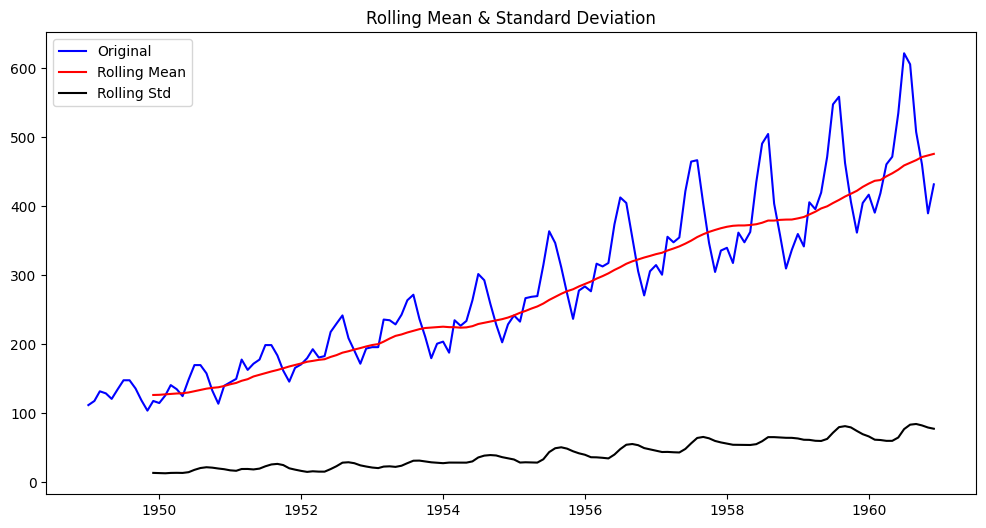

In [12]:
# prompt: Calculate mean and standard deviation of 12 month rolling window and infer the graphs

# Calculate the 12-month rolling mean and standard deviation
df['Rolling_Mean'] = df['Thousands of Passengers'].rolling(window=12).mean()
df['Rolling_Std'] = df['Thousands of Passengers'].rolling(window=12).std()

# Plot the rolling statistics
plt.figure(figsize=(12, 6))
orig = plt.plot(df['Thousands of Passengers'], color='blue',label='Original')
mean = plt.plot(df['Rolling_Mean'], color='red', label='Rolling Mean')
std = plt.plot(df['Rolling_Std'], color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

# Inference:
# Observe the rolling mean and standard deviation plots.  A stationary time series should have a constant mean and standard deviation over time.
# If the rolling mean and standard deviation exhibit significant trends or fluctuations, it suggests that the time series is non-stationary and may require transformations or differencing to achieve stationarity.

In [11]:
df['Thousands of Passengers'].rolling(window=12).mean()
df['Thousands of Passengers'].rolling(window=12).std()

,Thousands of Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,83.630500
1960-09-01,84.617276
1960-10-01,82.541954


### Question 3:
#### Perform proper type of Seasonal Decomposition
#### Perform autocorrelation plots
#### Perform test for stationarity
#### Apply different types of differencing and any other transformations if stationarity not met

<Figure size 1200x800 with 0 Axes>

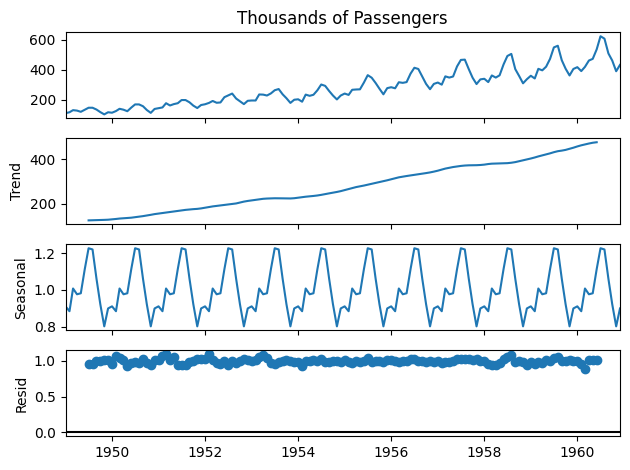

<Figure size 1200x600 with 0 Axes>

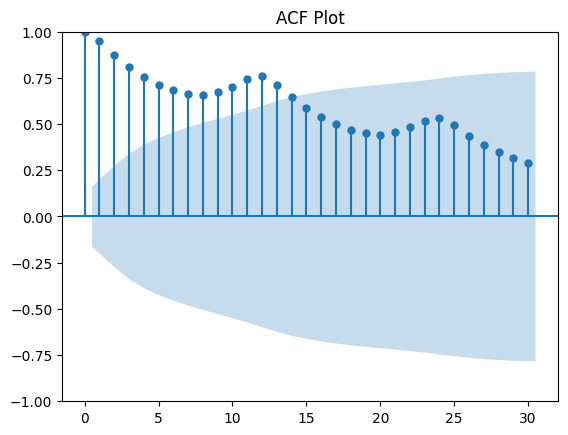

<Figure size 1200x600 with 0 Axes>

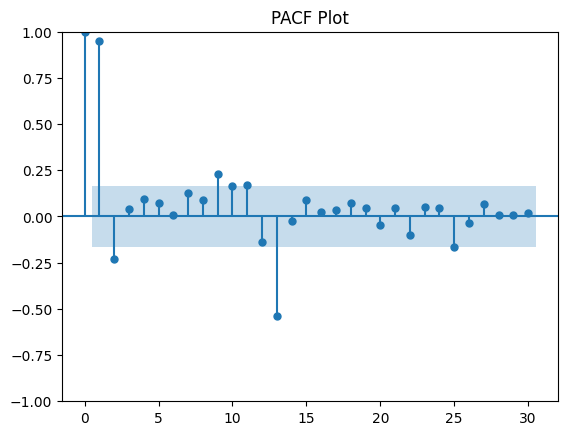

In [13]:
# prompt: Perform proper type of Seasonal Decomposition

# Perform Seasonal Decomposition
decomposition = seasonal_decompose(df['Thousands of Passengers'], model='multiplicative', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# Perform autocorrelation and partial autocorrelation plots
plt.figure(figsize=(12, 6))
plot_acf(df['Thousands of Passengers'], lags=30)
plt.title('ACF Plot')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Thousands of Passengers'], lags=30)
plt.title('PACF Plot')
plt.show()

# Test for stationarity using ADF test
adf_test(df['Thousands of Passengers'])

# Apply differencing if stationarity is not met
# Example: First-order differencing
df['First_Difference'] = diff(df['Thousands of Passengers'], k_diff=1)
df['First_Difference'].dropna(inplace=True)
adf_test(df['First_Difference'], title='ADF Test on First Difference')

# You can try higher-order differencing or other transformations if needed.
# Example: Seasonal differencing
df['Seasonal_Difference'] = diff(df['Thousands of Passengers'], k_diff=12)
df['Seasonal_Difference'].dropna(inplace=True)
adf_test(df['Seasonal_Difference'], title='ADF Test on Seasonal Difference')

<Figure size 1200x600 with 0 Axes>

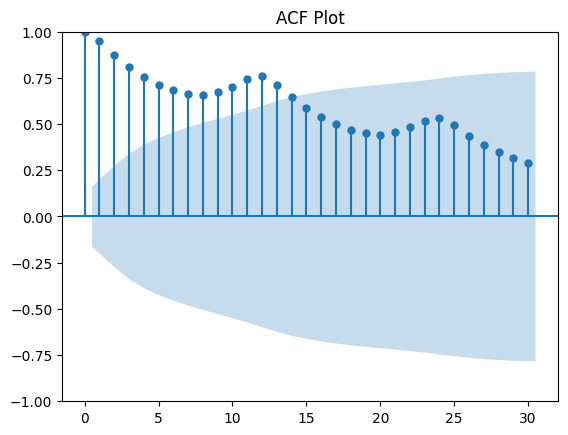

<Figure size 1200x600 with 0 Axes>

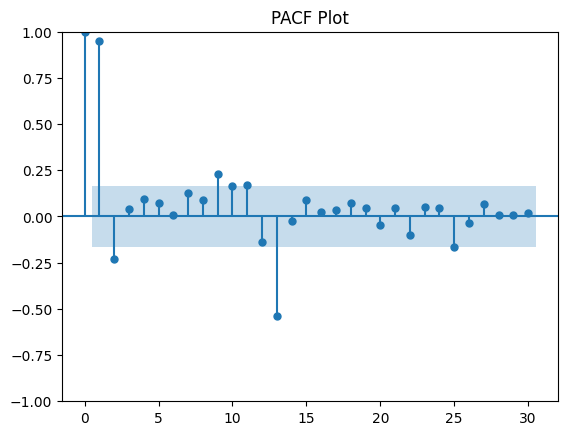

In [14]:
# prompt: Perform autocorrelation plots

import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.arima_model import ARMAResults,ARIMAResults
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
from dateutil.parser import parse
from scipy import stats
from scipy.stats import normaltest
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima

# Assuming the code you provided is in a file named 'your_script.py'
# and you have the 'International-airline-passengers.csv' file in your working directory or Colab environment.

# Replace 'your_script.py' with the actual filename if different.
# %run your_script.py

# The following code will execute the necessary parts from your script to perform autocorrelation plots,
# assuming the data loading and preprocessing are correctly done in the original script.


# ... (All the code from the previous response, up to where the auto correlation plots were created)

# Perform autocorrelation and partial autocorrelation plots
plt.figure(figsize=(12, 6))
plot_acf(df['Thousands of Passengers'], lags=30)
plt.title('ACF Plot')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Thousands of Passengers'], lags=30)
plt.title('PACF Plot')
plt.show()

# ... (rest of your code from the previous response)

## train-test split

As a general rule we set the length of test set equal to the intended forecast size. That is, for a monthly dataset you might want to forecast out one more year. Therefore your test set should be one year long.

In [15]:
# prompt: Perform test for stationarity

# Test for stationarity using ADF test
adf_test(df['Thousands of Passengers'])

# Apply differencing if stationarity is not met
# Example: First-order differencing
df['First_Difference'] = diff(df['Thousands of Passengers'], k_diff=1)
df['First_Difference'].dropna(inplace=True)
adf_test(df['First_Difference'], title='ADF Test on First Difference')

# You can try higher-order differencing or other transformations if needed.
# Example: Seasonal differencing
df['Seasonal_Difference'] = diff(df['Thousands of Passengers'], k_diff=12)
df['Seasonal_Difference'].dropna(inplace=True)
adf_test(df['Seasonal_Difference'], title='ADF Test on Seasonal Difference')

In [17]:
len(df)

144

In [18]:
train= df.iloc[:len(df)-12]
test= df.iloc[len(df)-12:]

In [19]:
print(len(train))
print(len(test))

132
12


# Question 3: Fit the model
<a id="arima"> </a>
### Perform autoARIMA to model ARIMA, SARIMA and SARIMAX on the dataset and check predictions on test

In [20]:
# prompt: Perform autoARIMA to model ARIMA, SARIMA and SARIMAX on the dataset and check predictions on test

# Auto-ARIMA for ARIMA
auto_arima_model = auto_arima(train['Thousands of Passengers'], seasonal=False, trace=True)
arima_model = ARIMA(train['Thousands of Passengers'], order=auto_arima_model.order)
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(train), end=len(df)-1)
arima_rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'], arima_predictions))
print(f"ARIMA RMSE: {arima_rmse}")

# Auto-ARIMA for SARIMA
auto_sarima_model = auto_arima(train['Thousands of Passengers'], seasonal=True, m=12, trace=True)
sarima_model = SARIMAX(train['Thousands of Passengers'], order=auto_sarima_model.order, seasonal_order=auto_sarima_model.seasonal_order)
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.predict(start=len(train), end=len(df)-1)
sarima_rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'], sarima_predictions))
print(f"SARIMA RMSE: {sarima_rmse}")

# Auto-ARIMA for SARIMAX (assuming exogenous variables exist)
# Replace 'exog_variable' with your actual exogenous variable name
# If no exogenous variables, use SARIMA instead.
# auto_sarimax_model = auto_arima(train['Thousands of Passengers'], exogenous=train['exog_variable'], seasonal=True, m=12, trace=True)
# sarimax_model = SARIMAX(train['Thousands of Passengers'], exog=train['exog_variable'], order=auto_sarimax_model.order, seasonal_order=auto_sarimax_model.seasonal_order)
# sarimax_model_fit = sarimax_model.fit()
# sarimax_predictions = sarimax_model_fit.predict(start=len(train), end=len(df)-1, exog=test['exog_variable'])
# sarimax_rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'], sarimax_predictions))
# print(f"SARIMAX RMSE: {sarimax_rmse}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1276.259, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1225.563, Time=0.15 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 2.852

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA RMSE: 55.22283915688796
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.93 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.34 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.34 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.03 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.34 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.82 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.28 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.48 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.13 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.38 sec
 ARIMA(2,0,0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


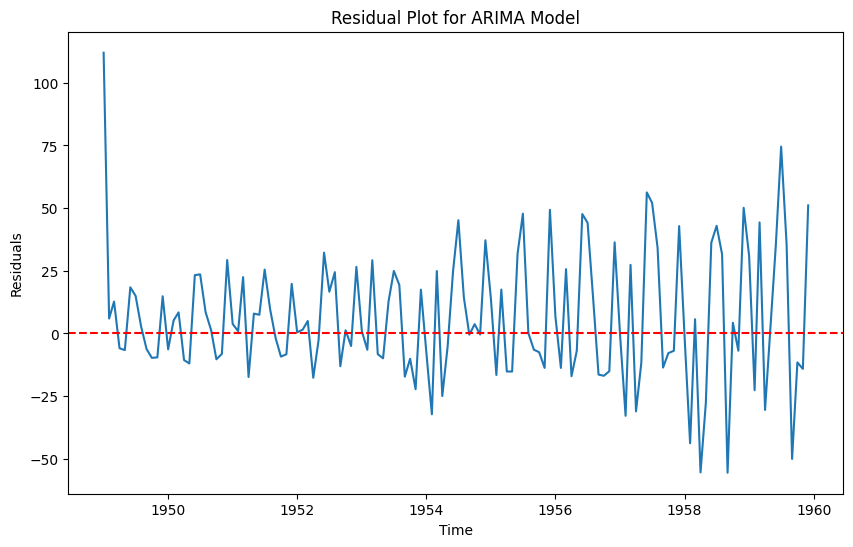

In [21]:
# prompt: residual plot for ARIMA model

import matplotlib.pyplot as plt

# Assuming 'arima_model_fit' is your fitted ARIMA model
residuals = arima_model_fit.resid

# Create the residual plot
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residual Plot for ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()